In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('tic-tac-toe.data.csv')

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

from sklearn.tree import DecisionTreeClassifier

In [3]:
data

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [4]:
data.isnull().sum()

top-left-square         0
top-middle-square       0
top-right-square        0
middle-left-square      0
middle-middle-square    0
middle-right-square     0
bottom-left-square      0
bottom-middle-square    0
bottom-right-square     0
Class                   0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   top-left-square       958 non-null    object
 1   top-middle-square     958 non-null    object
 2   top-right-square      958 non-null    object
 3   middle-left-square    958 non-null    object
 4   middle-middle-square  958 non-null    object
 5   middle-right-square   958 non-null    object
 6   bottom-left-square    958 non-null    object
 7   bottom-middle-square  958 non-null    object
 8   bottom-right-square   958 non-null    object
 9   Class                 958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


In [6]:
# Positive = 1; Negative = 0;
data['Class'] = data['Class'].replace('positive', 1)
data['Class'] = data['Class'].replace('negative', 0)

In [7]:
# x = 1; b = 0; o = -1;
data = data.replace(('x'), 1)
data = data.replace(('b'), 0)
data = data.replace(('o'), -1)


In [8]:
y = data['Class']
x = data.drop('Class', axis = 1)

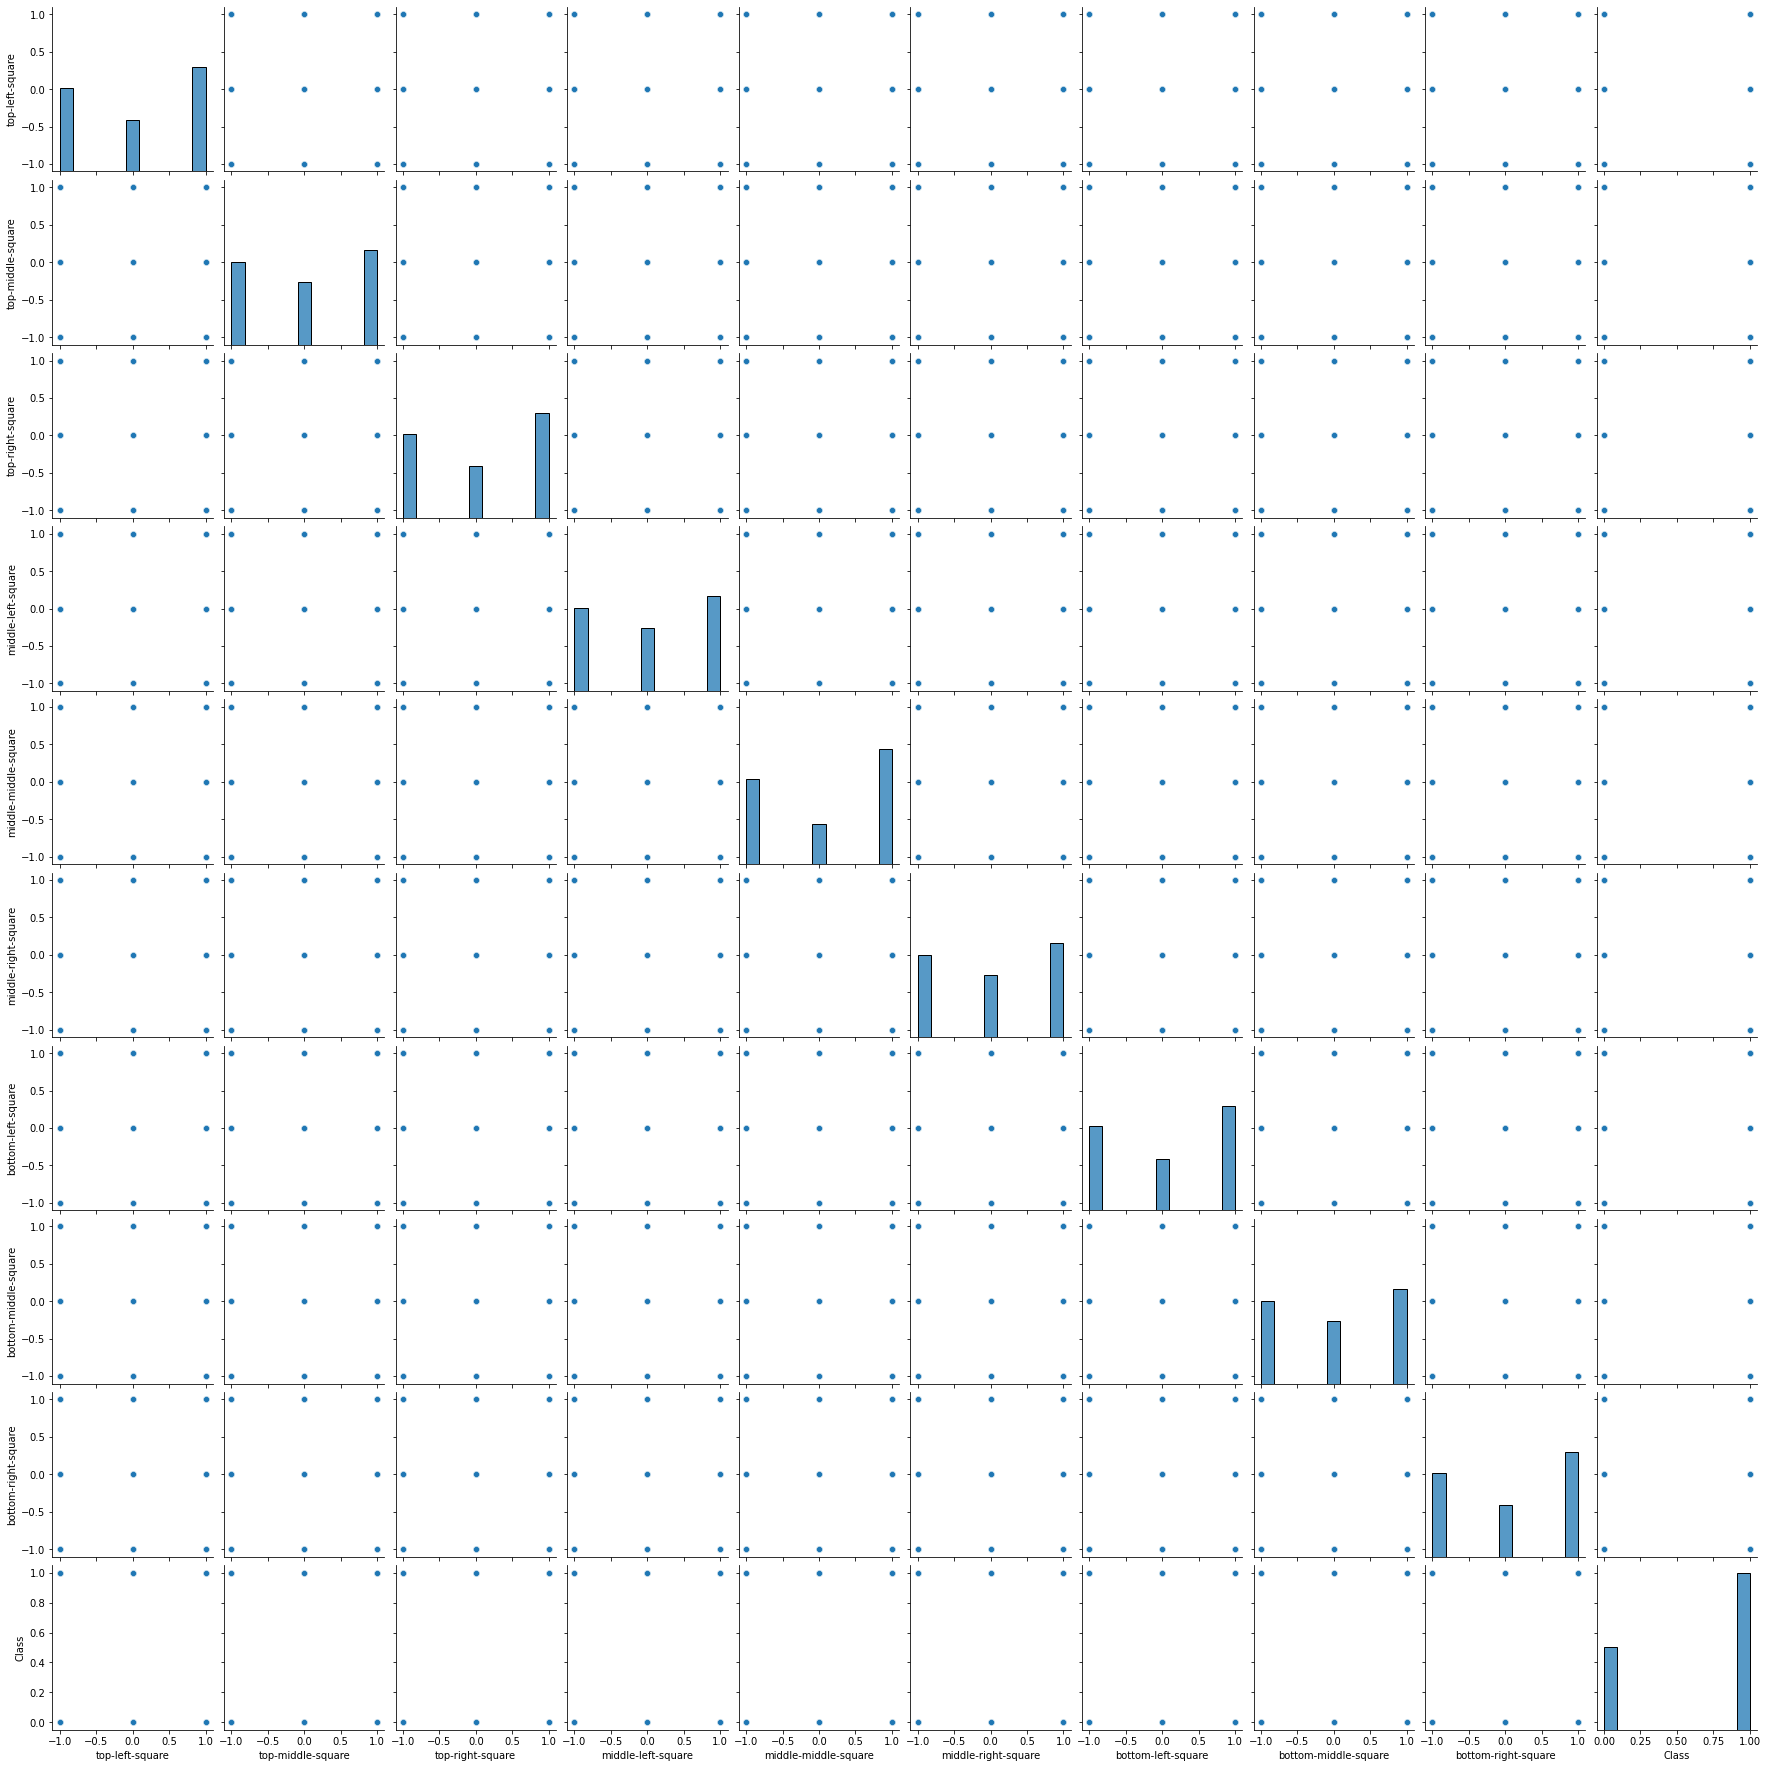

In [9]:
sns.pairplot(data)

In [10]:
X_train,X_test,Y_train,Y_test= train_test_split(x,y, test_size=0.2,random_state=0)

In [11]:

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# LR

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [18]:
y_pred = classifier.predict(X_test)

In [20]:
# Result
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        74
           1       0.96      1.00      0.98       118

    accuracy                           0.97       192
   macro avg       0.98      0.97      0.97       192
weighted avg       0.98      0.97      0.97       192



# dtc

In [12]:
dtc= DecisionTreeClassifier()


dtc.fit(X_train, Y_train)
pred = dtc.predict(X_test)

In [13]:

#importing metrics confusion matrix
print("Accuracy", accuracy_score(Y_test,pred)*100)

Accuracy 94.79166666666666


In [14]:
print(classification_report(Y_test, pred))



              precision    recall  f1-score   support

           0       0.94      0.92      0.93        74
           1       0.95      0.97      0.96       118

    accuracy                           0.95       192
   macro avg       0.95      0.94      0.94       192
weighted avg       0.95      0.95      0.95       192



# KNN

In [15]:
#  KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)


classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)



In [16]:
# Result
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00       118

    accuracy                           1.00       192
   macro avg       1.00      1.00      1.00       192
weighted avg       1.00      1.00      1.00       192



In [27]:
new_data=pd.DataFrame({'top-left-square':1	,'top-middle-square':	1,'top-right-square':	1,'middle-left-square':1	,'middle-middle-square':-1	,'middle-right-square':-1 ,'bottom-left-square':1 ,'bottom-middle-square':-1 ,'bottom-right-square':-1 },index=[1])

In [28]:
# class 1=positive 0=negative
y_pred=classifier.predict(new_data)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [29]:
y_pred

array([1])

In [30]:
data.tail()

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,Class
953,-1,1,1,1,-1,-1,-1,1,1,0
954,-1,1,-1,1,1,-1,1,-1,1,0
955,-1,1,-1,1,-1,1,1,-1,1,0
956,-1,1,-1,-1,1,1,1,-1,1,0
957,-1,-1,1,1,1,-1,-1,1,1,0
